In [15]:
import os
import sys
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import fasttext
import fasttext.util
import pandas as pd
import seaborn as sns
import io

In [16]:
from weat_wefat.src.lib import weat

In [3]:
ot = fasttext.load_model('/Users/adimaini/Documents/GW/Research/CODE.nosync/WEAT-WEFAT/data/OpenTitle/10pct_embeddings-005.bin')

In [14]:
ot.get_words()

['</s>',
 'the',
 'to',
 'I',
 'you',
 'a',
 'of',
 'and',
 'in',
 'that',
 'it',
 'is',
 'me',
 'for',
 'have',
 'this',
 'was',
 'on',
 'be',
 'your',
 'my',
 'You',
 'with',
 'not',
 'Im',
 'we',
 'know',
 'are',
 'like',
 'just',
 'And',
 'do',
 'he',
 'The',
 'all',
 'dont',
 'out',
 'get',
 'at',
 'what',
 'here',
 'about',
 'up',
 'him',
 'but',
 'can',
 'her',
 'one',
 'will',
 'so',
 'if',
 'were',
 'its',
 'from',
 'as',
 'got',
 'go',
 'But',
 'his',
 'there',
 'want',
 'think',
 'Its',
 'they',
 'We',
 'right',
 'Well',
 'an',
 'now',
 'no',
 'time',
 'had',
 'us',
 'youre',
 'see',
 'them',
 'He',
 'going',
 'been',
 'back',
 'would',
 'she',
 'when',
 'So',
 'or',
 'our',
 'It',
 'gonna',
 'If',
 'Ill',
 'some',
 'by',
 'A',
 'who',
 'has',
 'What',
 'come',
 'take',
 'could',
 'This',
 'did',
 'how',
 'more',
 'No',
 'good',
 'cant',
 'need',
 'say',
 'make',
 'really',
 'way',
 'Oh',
 'man',
 'didnt',
 'Ive',
 'then',
 'tell',
 'something',
 'people',
 'only',
 'too',
 

### get the frequency of bellezza translated words in fastText haitian creole word embeddings

In [2]:
ft = fasttext.load_model('data/cc.ht.300.bin')

In [4]:
ft_freq = pd.DataFrame({'words': ot.get_words(include_freq=True)[0], 
                        'frequency': ot.get_words(include_freq=True)[1]})

In [9]:
ft_freq.frequency.sum()

78663474

In [5]:
ft_freq.sort_values(by='frequency', ascending=False)

,words,frequency
0,</s>,8900000
1,the,2323573
2,to,1839386
3,I,1821961
4,you,1758768
...,...,...
138008,puter,5
138009,MEEK,5
138010,middleoftheroad,5
138011,Taiyo,5


In [11]:
ft_freq.frequency.sum()

16592390

In [27]:
bell_words = pd.read_csv('/Users/adimaini/Documents/GW/Research/CODE.nosync/WEAT-WEFAT/data/Bellezza Translations', 
                       usecols=['Haitian Creole word']).values.flatten()

In [72]:
ft_freq_hist = ft_freq[ft_freq['words'].isin(bell_words)].sort_values('frequency')

In [78]:
ft_freq_hist

,words,frequency
111628,bouzen,10
68929,fyète,10
68133,siklon,10
67747,karès,10
66071,pèfeksyon,10
...,...,...
113,fèt,11797
46,sa,34259
28,pou,73921
26,genyen,81485


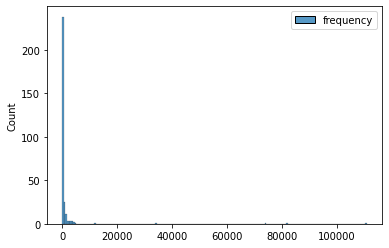

In [76]:
sns.histplot(ft_freq_hist, bins=200)

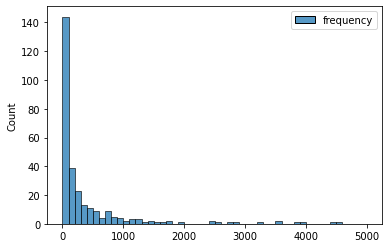

In [77]:
sns.histplot(ft_freq_hist, bins=50, binrange=[0, 5000])

### get the belezza word frequency in fastText english word embeddings to compare frequency of the words

In [84]:
def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

In [ ]:
ft_eng = load_vectors('data/crawl-300d-2M.vec')

In [ ]:
ft_eng

### Record the radio streams

In [1]:
import requests

# stream_url = 'https://node-24.zeno.fm/54k0v7x14neuv?rj-ttl=5&rj-tok=AAABdulgsqMAZQZWFeQSsTHY_A'
# stream_url = 'https://node-15.zeno.fm/54k0v7x14neuv?rj-ttl=5&rj-tok=AAABdv6a_v0Aw7ztClNLYwOOjg'
stream_url = 'https://stream.zenolive.com/4sqccruhey5tv' # Radio RCH 2000

r = requests.get(stream_url, stream=True)

with open('recording_newlink.mp3', 'wb') as f:
    try:
        for block in r.iter_content(1024):
            f.write(block)
    except KeyboardInterrupt:
        pass

In [12]:
60/3.9 * 4.2 

64.61538461538461

In [ ]:
api_url = 'https://speech.googleapis.com/v1p1beta1/speech:recognize'

In [9]:
def transcribe_file(speech_file):
    """Transcribe the given audio file asynchronously."""
    from google.cloud import speech

    client = speech.SpeechClient.from_service_account_json('/Users/adimaini/Documents/GW/Machine Learning/Research/FastText.nosync/Google speech-to-text/My Project 16457-e96d5cc9e81c.json')
    
    with io.open(speech_file, "rb") as audio_file:
        content = audio_file.read()

    """
     Note that transcription is limited to a 60 seconds audio file.
     Use a GCS file for audio longer than 1 minute.
    """
    audio = speech.RecognitionAudio(content=content)

    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
        sample_rate_hertz=16000,
        language_code="fr-FR",
    )


    operation = client.long_running_recognize(config=config, audio=audio)

    print("Waiting for operation to complete...")
    response = operation.result(timeout=90)

    # Each result is for a consecutive portion of the audio. Iterate through
    # them to get the transcripts for the entire audio file.
    for result in response.results:
        # The first alternative is the most likely one for this portion.
        print(u"Transcript: {}".format(result.alternatives[0].transcript))
        print("Confidence: {}".format(result.alternatives[0].confidence))

In [10]:
import io
speech_file = '/Users/adimaini/Documents/GW/Machine Learning/Research/FastText.nosync/Radio RCH2000.mp3'
transcribe_file(speech_file)

InvalidArgument: 400 Request payload size exceeds the limit: 10485760 bytes.